In [1]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import nltk
import pandas as pd
import re
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import remove_stopwords
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
df=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Dataset/Spam Mail classification/spam_ham_dataset.xls")
df.head()

,Sr No,text,label
0,1,Subject: enron methanol ; meter # : 988291\r\n...,ham
1,2,"Subject: hpl nom for january 9 , 2001\r\n( see...",ham
2,3,"Subject: neon retreat\r\nho ho ho , we ' re ar...",ham
3,4,"Subject: photoshop , windows , office . cheap ...",spam
4,5,Subject: re : indian springs\r\nthis deal is t...,ham


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Sr No   5171 non-null   int64 
 1   text    5171 non-null   object
 2   label   5171 non-null   object
dtypes: int64(1), object(2)
memory usage: 121.3+ KB


In [5]:
df['label'].value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

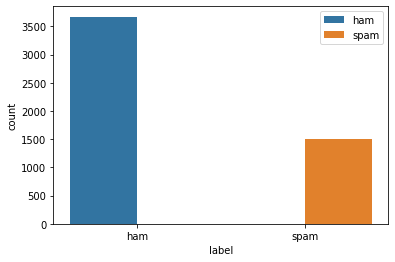

In [6]:
sns.countplot(x='label',hue='label',data=df)
plt.legend(bbox_to_anchor=(1,1))


In [7]:
df.columns

Index(['Sr No', 'text', 'label'], dtype='object')

In [8]:
df=df[['Sr No', 'text', 'label']]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Sr No   5171 non-null   int64 
 1   text    5171 non-null   object
 2   label   5171 non-null   object
dtypes: int64(1), object(2)
memory usage: 121.3+ KB


In [10]:
#Model_Eval Fun

from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import accuracy_score
def model_Eval(y_test,y_pred):

    acc=accuracy_score(y_test,y_pred)
    print("Accuracy :-",acc)
    print("Error rate :-",1-acc)
    print("Precision:-",precision_score(y_test,y_pred,average='weighted'))
    print("Recall:- ",recall_score(y_test,y_pred,average='weighted'))
    print("F1 score :- ",f1_score(y_test,y_pred,average='weighted'))

    #Confusion matrix
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(y_test,y_pred)
    print(cm)
    plt.figure(figsize=(10,5))

    sns.heatmap(cm,annot=True,cmap="YlGnBu")
    plt.xlabel('Predicted')
    plt.ylabel("Actual")

In [11]:
nltk.download('stopwords')
stemmer=PorterStemmer()
lemmatizer=WordNetLemmatizer()
stop_words=set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
nltk.download('wordnet')
nltk.download('omw-1.4')
corpus=[]
for i in range(len(df)):
  #remove all other char except a-z and A-Z
  sent=re.sub('[^a-zA-z]',' ',df['text'][i])

  #Convert into Lower Casing
  sent=sent.lower()

  #Lemmitizing
  sent=" ".join([lemmatizer.lemmatize(word) for word in str(sent).split()])

  #Remove Stopword
  sent=" ".join([word for word in str(sent).split() if(word not in stop_words)])
  corpus.append(sent)
#corpus


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [13]:
#Lemmatizer+TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(max_features=5000)
X=cv.fit_transform(corpus).toarray()
X
#output
y=df['label']

In [ ]:
X.shape

(5171, 5000)

In [ ]:
type(X)

In [14]:
%cd /content/drive/MyDrive/Colab Notebooks/DSCT/NLP/Spam Mail Classifier

/content/drive/MyDrive/Colab Notebooks/DSCT/NLP/Spam Mail Classifier


In [15]:
!pwd

/content/drive/MyDrive/Colab Notebooks/DSCT/NLP/Spam Mail Classifier


In [ ]:
import joblib
joblib.dump(cv,"cv.pkl")
print("saved")

saved


In [16]:
temp_df=pd.DataFrame(X,columns=cv.get_feature_names())
temp_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,ab,abacustech,abdominal,abdv,abhorred,abiiity,ability,able,absence,...,zajac,zapata,zero,zeroed,zimbabwe,zivley,zone,zonedubai,zu,zyban
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.19194,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# split data into traning and testing
# train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [18]:
print("X_train:-",X_train.shape)
print("X_test:-",X_test.shape)
print("y_train:-",y_train.shape)
print("y_test:-",y_test.shape)

X_train:- (4136, 5000)
X_test:- (1035, 5000)
y_train:- (4136,)
y_test:- (1035,)


mpdel created
model trained
find y_pred
accuracy for Decision Tree:-  70.82125603864733
Accuracy :- 0.7082125603864734
Error rate :- 0.2917874396135266
Precision:- 0.7936827900307848
Recall:-  0.7082125603864734
F1 score :-  0.5911178758128267
[[729   0]
 [302   4]]


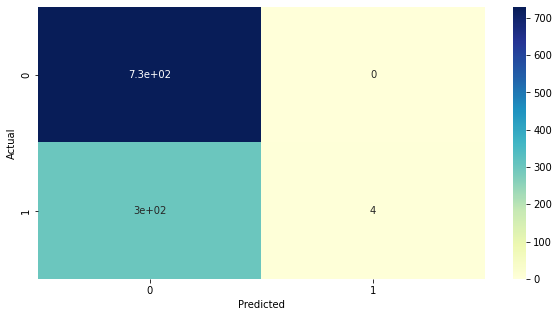

In [ ]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# model creation
ML_Model=RandomForestClassifier(max_depth=2)
print("mpdel created")

# model train
ML_Model.fit(X_train,y_train)
print("model trained")

# find y_pred
y_pred=ML_Model.predict(X_test)
print("find y_pred")

# find accuracy
acc=accuracy_score(y_test,y_pred)
print("accuracy for Decision Tree:- ",acc*100)

# model evaluation
model_Eval(y_test,y_pred)

In [ ]:
import joblib
joblib.dump(ML_Model,"RFC_Model.pkl")
print("saved")

saved


mpdel created
model trained
find y_pred
accuracy for Decision Tree:-  97.0048309178744
Accuracy :- 0.970048309178744
Error rate :- 0.02995169082125604
Precision:- 0.9711072686601703
Recall:-  0.970048309178744
F1 score :-  0.970276386273731
[[705  24]
 [  7 299]]


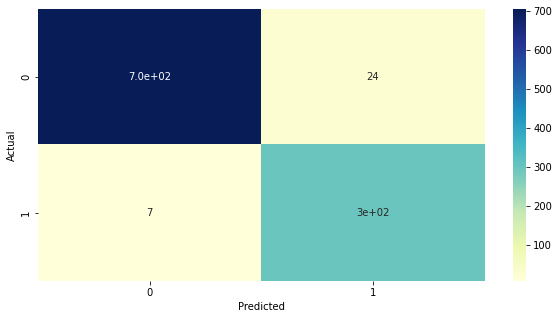

In [ ]:
#AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# model creation
ML_Model=AdaBoostClassifier(n_estimators=100, random_state=0)
print("mpdel created")

# model train
ML_Model.fit(X_train,y_train)
print("model trained")

# find y_pred
y_pred=ML_Model.predict(X_test)
print("find y_pred")

# find accuracy
acc=accuracy_score(y_test,y_pred)
print("accuracy for Decision Tree:- ",acc*100)

# model evaluation
model_Eval(y_test,y_pred)

In [ ]:
import joblib
joblib.dump(ML_Model,"ADB_Model.pkl")
print("saved")

saved


In [ ]:
!pwd

/content/drive/MyDrive/Colab Notebooks/DSCT/NLP/Spam Mail Classifier


model created
model traning completed
y_pred completed
Accuracy :- 0.9768115942028985
Error rate :- 0.023188405797101463
Precision:- 0.9768115942028985
Recall:-  0.9768115942028985
F1 score :-  0.9768115942028985
[[717  12]
 [ 12 294]]


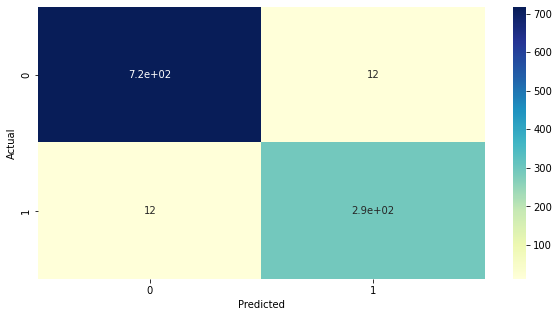

In [19]:
# create a model NB
from sklearn.naive_bayes import GaussianNB
ML_model=GaussianNB()
print("model created")

#model traning
ML_model.fit(X_train,y_train)
print("model traning completed")

#find t y_pred
y_pred=ML_model.predict(X_test)
print("y_pred completed")
# model evaluation
model_Eval(y_test,y_pred)

model created
model traning completd
y_pred find
accuracy :-  98.55072463768117
Accuracy :- 0.9855072463768116
Error rate :- 0.01449275362318836
Precision:- 0.9858022774327122
Recall:-  0.9855072463768116
F1 score :-  0.985567257778978
[[717  12]
 [  3 303]]


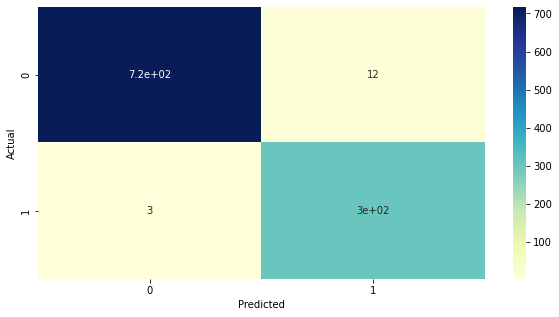

In [21]:
# created Model for svm (rbf)

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
#model creation
ML_Model=SVC(kernel="rbf")
print('model created')
# model train
ML_Model.fit(X_train,y_train)
print("model traning completd")
#find y_pred
y_pred=ML_Model.predict(X_test)
print("y_pred find")
#accuracy
acc=accuracy_score(y_test,y_pred)
print("accuracy :- ",acc*100)
# model evaluation
model_Eval(y_test,y_pred)